## Bias Correction and Goal Focus

Bias is a hidden problem in many data sets. Almost all cases, bias is not intentional, but rather the natural result of data entry.

Goal focus means that we look for elements of the data that better represent the objectives for our analysis. This may require transformations or slicing the data to get at the important characteristics for the analysis.

In [ ]:
# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from collections import Counter
import json
from sklearn.preprocessing import StandardScaler

# Statistics
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

# Check for errors

## Load the accident data

In [ ]:
# Read the JSON file
# Make the keys integers again



In [ ]:
# Load the transformed train accident data from Data Engineering 6.



## In-Class Exercise 1

- Make the following yearly time series plots:

    - Costs of accidents 
    - Number of accidents
    - Number of casualties 
    

## In-Class Exercise 2

- Overlay the most expensive accident in each year on the time series plot of cost per year (see the image below)
- What bias is present in this plot?
- Correct for the bias
- Plot the bias corrected variable

You will need this  url: http://data.bls.gov/cgi-bin/cpicalc.pl
   

### Cost per Year with the Most Expensive Accidents per Year

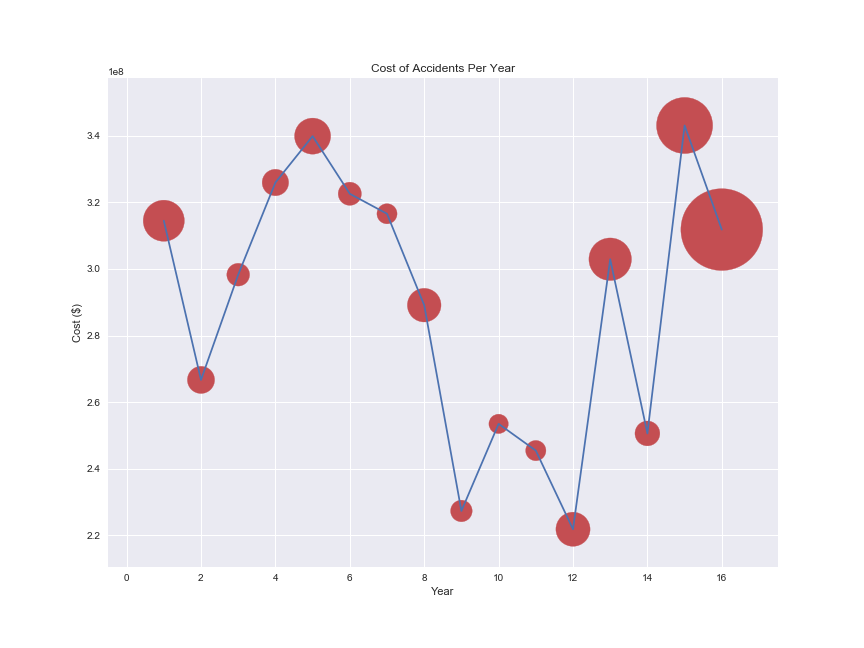



## In-Class Exercise 3

Look at the inflation corrected plot. Which year is now the most costly? Look at narrative for the most costly accident in that year. Why is this another example of bias?

Make the correction and replot the time series plot of total accident costs per year with the overlay of the most expensive accident.



## In-Class Exercise 4 - Goal Focus

Look at the box plot of the ACCDMG variable (transformed as in exercise 2). 

- What derived variables (i.e., dataframe) is suggested in order to focus the analysis on the most significant (in cost) accidents? 
- What percentage the cost of accidents are attribuatable to these exteme accidents?
- What percentage of the numbe of accidents are extreme?

Recall our box plots for casualties.

- What derived dataframe is suggested in order to focus the analysis on accidents that cause casualties?
- What percentage of accidents have casualties?

## In-Class Exercise 5

Graph the following

- Bar plot to compare the percent of costs of accidents for types of accidents for all accidents, extreme damage accidents and accidents with casualties.
- Bar plot to compare the costs of accidents for types of trains for all accidents, extreme damage accidents and accidents with casualties.
- Bar plot to compare the costs of accidents for major causes of accidents for all accidents, extreme damage accidents and accidents with casualties.
- Scatter plots (joint plots) of the log of accident damage vs. train speed to compare the extreme accidents, accidents with casualties and  all accidents.
- Scatter plots (joint plots) of the log of accident damage vs. train speed to compare the extreme accidents, accidents with casualties and  all accidents conditioned on types of accidents and major causes.

## Transformation Pipeline

In [ ]:
# Load our orginial untransformed data

path = "/Users/donaldbrown/Dropbox/department/Classes/Data/TrainAccidents/TrainAccidentsClean/"

file = "TrainAccidentsClean.csv"

accidents_clean_df = pd.read_csv(path + file, low_memory = False)

accidents_clean_df.shape
    


In [ ]:
# Creating Casualty transformation
# two column input


from sklearn.base import BaseEstimator, TransformerMixin

class CasualtiesAdder(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        Casualties = X[:, 0] + X[:,1]
        return Casualties
    





In [ ]:
# Need to select columns from the data frame

casualty_variables = ['TOTKLD', 'TOTINJ']
cause_variable = ['CAUSE']


from sklearn.pipeline import FeatureUnion
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Pipeline

from sklearn.pipeline import Pipeline

traindata_tranformer_pipeline = Pipeline([
    ('selector', DataFrameSelector(attribute_names = casualty_variables)),
    ('casualtyVar', CasualtiesAdder())
])

#    ('scaler', StandardScaler())
#('majorCausesVar', CausalValueSelect())

In [ ]:
# casualty_var_add = ()
# accidents_df['Casualties'] = casualty_var_add.transform(accidents_df[['TOTKLD', 'TOTINJ']].values)
# accidents_df['Casualties'].mean()

casualty_array =  traindata_tranformer_pipeline.fit_transform(accidents_clean_df)

np.mean(casualty_array)

## Extra Credit (5 points) 

Create a transformation pipeline using cleaning or data transformation steps for the train accident data.